# 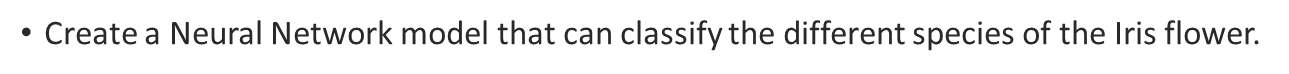New Section


Step 1: Load the libraries

In [ ]:
import pandas
#import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Step 2: Load the dataset

In [ ]:
# load dataset
dataframe = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
dataset = dataframe.values
# In X, Input Variables are stored
X = dataset[:,0:4].astype(float) 
# In Y, output variable is stored
Y = dataset[:,4]

In [ ]:
dataframe.head

<bound method NDFrame.head of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

Step 3: Perform One hot encoding

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
print(dummy_y)

Step 4: Split the dataset into training Data and Testing Data

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, dummy_y , test_size=0.25, random_state=2)

In [ ]:
print(Y_validation)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


Step 5: Define the Model

In [ ]:
model = Sequential()
#Input layer with 1 hidden layer
model.add(Dense(8, input_dim=4, activation='relu'))
#Output Layer with 3 classes
model.add(Dense(3, activation='softmax'))


Step 6: Compile the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Step 7: Fit the Model

In [ ]:
history=model.fit(X_train,Y_train,epochs=200, batch_size=5)

Epoch 1/200
23/23 [==============================] - 0s 893us/step - loss: 1.2161 - accuracy: 0.2820
Epoch 2/200
23/23 [==============================] - 0s 973us/step - loss: 1.0971 - accuracy: 0.3754
Epoch 3/200
23/23 [==============================] - 0s 1ms/step - loss: 1.0141 - accuracy: 0.3239
Epoch 4/200
23/23 [==============================] - 0s 951us/step - loss: 0.9099 - accuracy: 0.4310
Epoch 5/200
23/23 [==============================] - 0s 915us/step - loss: 0.9491 - accuracy: 0.3739
Epoch 6/200
23/23 [==============================] - 0s 949us/step - loss: 0.9628 - accuracy: 0.3675
Epoch 7/200
23/23 [==============================] - 0s 893us/step - loss: 0.9349 - accuracy: 0.4534
Epoch 8/200
23/23 [==============================] - 0s 908us/step - loss: 0.8682 - accuracy: 0.5366
Epoch 9/200
23/23 [==============================] - 0s 897us/step - loss: 0.8713 - accuracy: 0.6064
Epoch 10/200
23/23 [==============================] - 0s 975us/step - loss: 0.8438 - accuracy

In [ ]:
loss,accuracy=model.evaluate(X_train,Y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9732


In [ ]:
print("Accuracy: %.2f%% Loss: %.2f%%" % (accuracy*100,loss*100))

Accuracy: 97.32% Loss: 14.64%


In [ ]:
Actual=model.predict_classes(X_validation)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in range(len(Y_validation)):
	print("X=%s, Predicted=%s" % (Y_validation[i], Actual[i]))

X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[0. 0. 1.], Predicted=2
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 1. 0.], Predicted=1
X=[0. 1. 0.], Predicted=1
X=[1. 0. 0.], Predicted=0
X=[0. 1. 0.], Predicted=1
X=[0. 0. 1.], Predicted=2
X=[0. 1. 0.], Predicted=1
X=[0. 1. 0.], Predicted=1
X=[0. 1. 0.], Predicted=1
X=[0. 0. 1.], Predicted=2
X=[0. 1. 0.], Predicted=1
X=[0. 1. 0.], Predicted=1
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[0. 0. 1.], Predicted=2
X=[1. 0. 0.], Predicted=0
X=[0. 1. 0.], Predicted=1
X=[0. 0. 1.], Predicted=2
X=[0. 1. 0.], Predicted=1
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[0. 1. 0.], Predicted=1
